# Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

# Model One Feature

## Create Function

In [ ]:
def read_data(location):
  '''
  Read data by name of location
  Parameters:
        location: Name of location
  Return:
        data: A dataframe of location
  '''
  data = pd.read_csv('/content/drive/MyDrive/Source code/Dataset/Final Dataset/{}.csv'.format(location))
  data.drop(columns=['Unnamed: 0'], inplace=True)

  data['RainToday'] = round(data['RainToday'])
  data['RainTomorrow'] = round(data['RainTomorrow'])

  return data

In [ ]:
def train_test(data):
  x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:-1], data.iloc[:,-1], test_size=0.2, random_state=0)

  return x_train, y_train, x_test, y_test

In [ ]:
def oneFeature(data, feature):
  '''
  Train model with one feature
  Return:
        accuracy, precision, recall, f1: Validation score of model
  '''
  x_train, y_train, x_test, y_test = train_test(data)

  x_train = x_train[[feature]] 
  x_test = x_test[[feature]]

  params = {'objective':'binary:logistic',
          'max_depth': 3,
          'learning_rate': 1,
          'n_estimators':10,
          'random_state':21}   

  model = xgb.XGBClassifier(**params)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  accuracy = model.score(x_test, y_test)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='macro')

  return accuracy, precision, recall, f1

In [ ]:
def model1Feature(location):
  '''
  Train model with one feature for each feature on dataset of location
  Return:
        result: A summary of the results of each model
  '''
  score = {}
  data = read_data(location)
  features = data.columns.drop(['RainTomorrow', 'Date'])

  for feature in features:
    accuracy, precision, recall, f1_score = oneFeature(data, feature)
    score[feature] = [accuracy, precision, recall, f1_score]
    
  result = pd.DataFrame.from_dict(score, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
  result.sort_values(by='F1-Score', ascending=False, inplace=True)
  return result

## MountGambier

In [ ]:
model1Feature('MountGambier')

,Accuracy,Precision,Recall,F1-Score
Humidity3pm,0.768371,0.689655,0.423280,0.685738
RainToday,0.683706,0.475138,0.455026,0.620188
Pressure9am,0.739617,0.666667,0.275132,0.612015
Rainfall,0.718850,0.569892,0.280423,0.597222
Pressure3pm,0.723642,0.593023,0.269841,0.596918
WindGustSpeed,0.714058,0.555556,0.264550,0.587228
MaxTemp,0.693291,0.483871,0.238095,0.560605
Temp3pm,0.712460,0.576271,0.179894,0.547455
WindDir3pm,0.701278,0.514706,0.185185,0.542217
WindDir9am,0.701278,0.519231,0.142857,0.519551


## MountGinini

In [ ]:
model1Feature('MountGinini')

,Accuracy,Precision,Recall,F1-Score
Humidity3pm,0.738693,0.626761,0.463542,0.675769
Rainfall,0.706868,0.548571,0.500000,0.655776
RainToday,0.701843,0.538043,0.515625,0.654496
WindSpeed3pm,0.693467,0.600000,0.140625,0.518313
Temp3pm,0.693467,0.615385,0.125000,0.508881
WindGustSpeed,0.680067,0.509804,0.135417,0.506575
MaxTemp,0.671692,0.465517,0.140625,0.504186
WindDir9am,0.671692,0.458333,0.114583,0.488941
WindSpeed9am,0.671692,0.433333,0.067708,0.457736
Humidity9am,0.676717,0.480000,0.062500,0.456528


#Train on all feature

## Create Function

In [ ]:
def XGBoost(location):
  data = read_data(location)
  x_train, y_train, x_test, y_test = train_test(data)

  params = {'objective':'binary:logistic',
            'max_depth': 3,
            'learning_rate': 1,
            'n_estimators':10,
            'random_state':21}

  xg = xgb.XGBClassifier(**params)
  xg.fit(x_train, y_train)
  y_pred = xg.predict(x_test)

  return y_test, y_pred

In [ ]:
def Logisticregression(location):
  data = read_data(location)
  x_train, y_train, x_test, y_test = train_test(data)

  lr = LogisticRegression() 
  
  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)

  return y_test, y_pred

In [ ]:
def SVM(location):
  data = read_data(location)
  x_train, y_train, x_test, y_test = train_test(data)

  svm = SVC(kernel='rbf') 
  
  svm.fit(x_train, y_train)
  y_pred = svm.predict(x_test)

  return y_test, y_pred

In [ ]:
def modelAllFeature(location, *args):
  '''
  Train model with all feature on dataset of location
  Return:
        A summary of the results of model
  '''
  for arg in args:
    y_test, y_pred = arg(location)

  print('Classification Report:\n', classification_report(y_test, y_pred))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
  plt.title(arg)

## MountGambier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       437
           1       0.76      0.58      0.65       189

    accuracy                           0.82       626
   macro avg       0.80      0.75      0.76       626
weighted avg       0.81      0.82      0.81       626



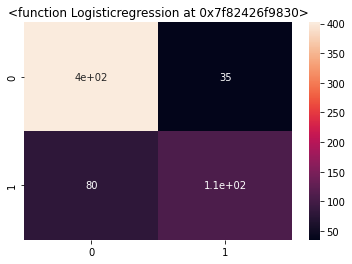

In [ ]:
modelAllFeature('MountGambier', Logisticregression)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       437
           1       0.71      0.59      0.65       189

    accuracy                           0.80       626
   macro avg       0.77      0.74      0.75       626
weighted avg       0.80      0.80      0.80       626



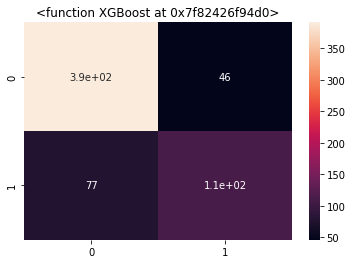

In [ ]:
modelAllFeature('MountGambier', XGBoost)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       437
           1       0.00      0.00      0.00       189

    accuracy                           0.70       626
   macro avg       0.35      0.50      0.41       626
weighted avg       0.49      0.70      0.57       626



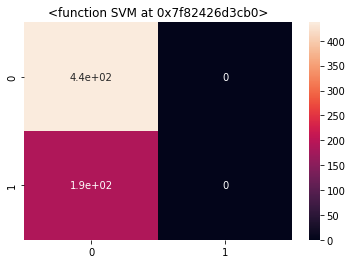

In [ ]:
modelAllFeature('MountGambier', SVM)

## MountGinini

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       405
           1       0.72      0.54      0.62       192

    accuracy                           0.79       597
   macro avg       0.76      0.72      0.73       597
weighted avg       0.78      0.79      0.78       597



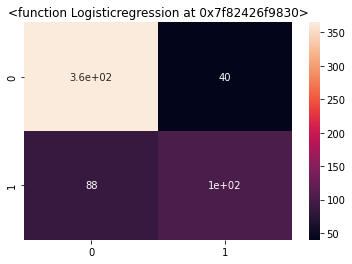

In [ ]:
modelAllFeature('MountGinini', Logisticregression)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       405
           1       0.69      0.55      0.61       192

    accuracy                           0.78       597
   macro avg       0.75      0.72      0.73       597
weighted avg       0.77      0.78      0.77       597



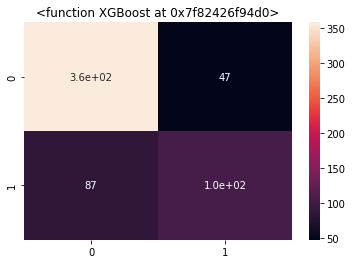

In [ ]:
modelAllFeature('MountGinini', XGBoost)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       405
           1       0.73      0.49      0.59       192

    accuracy                           0.78       597
   macro avg       0.76      0.70      0.72       597
weighted avg       0.77      0.78      0.76       597



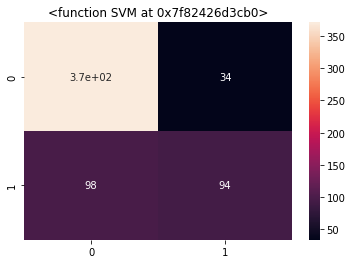

In [ ]:
modelAllFeature('MountGinini', SVM)

# Model To Deploy

Create model

In [ ]:
params = {'objective':'binary:logistic',
          'max_depth': 3,
          'learning_rate': 1,
          'n_estimators':10,
          'random_state':21}  

model = xgb.XGBClassifier(**params)

Create test input

In [ ]:
input_sample = {'MinTemp':13.5,
                'MaxTemp':36.1,

                'Temp3pm':35.3,

                'WindDir3pm':'ENE',

                'WindGustSpeed':43,
                'WindSpeed3pm':11,

                'Humidity9am':65,
          
                'Pressure9am':1017.1}

Create encode function

In [ ]:
def encode(input_sample):
  '''
  Encode input sample to put into model
  Return:
        input_sample: Input sample was encoded
  '''
  data2encode = pd.read_csv('/content/drive/MyDrive/Source code/Dataset/Dataset gốc/weatherAUS.csv')
  le = LabelEncoder()
  
  if 'WindGustDir' in input_sample.columns:
    le_WindGustDir = le.fit(data2encode['WindGustDir'])
    input_sample['WindGustDir'] = le_WindGustDir.transform(input_sample['WindGustDir'])
  if 'WindDir9am' in input_sample.columns:
    le_WindDir9am = le.fit(data2encode['WindDir9am'])
    input_sample['WindDir9am'] = le_WindDir9am.transform(input_sample['WindDir9am'])
  if 'WindDir3pm' in input_sample.columns:
    le_WindDir3pm = le.fit(data2encode['WindDir3pm'])
    input_sample['WindDir3pm'] = le_WindDir3pm.transform(input_sample['WindDir3pm'])
  if 'RainToday' in input_sample.columns:
    le_RainToday = le.fit(data2encode['RainToday'])
    input_sample['RainToday'] = le_RainToday.transform(input_sample['RainToday'])

  return input_sample

Create train model function

In [ ]:
def train_model(location, **info):
  '''
  Train model on dataset of location and features in input sample
  Parameters:
        location: Name of location.
        **info: A dict is input sample.
        For example:
              input_sample = {'MinTemp':13.5,
                              'MaxTemp':36.1,
                              'Temp3pm':35.3,
                              'WindDir3pm':'ENE',
                              'WindGustSpeed':43,
                              'WindSpeed3pm':11,
                              'Humidity9am':65,
                              'Pressure9am':1017.1}
  Return:
        Classification Report of model
        result (int): Predict of input sample
  '''
  features = list(info.keys())

  input_sample = pd.DataFrame.from_dict([info])
  input_sample = encode(input_sample)

  data = read_data(location)
  
  #Drop feature if feature in input sample not in dataset
  for feature in features:
    if feature not in data.columns:
      features.remove(feature)
      input_sample.drop(columns=feature, inplace=True)
  
  x = data.iloc[:,1:-1]
  y = data.iloc[:,-1]

  x_train, y_train, x_test, y_test = train_test(data)

  x_train = x_train[features]
  x_test = x_test[features]

  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print(classification_report(y_test, y_pred))
  result = model.predict(input_sample)

  return result

In [ ]:
result = train_model('MountGambier', **input_sample)

if result == 0:
  print('\nKết quả dự đoán: Không mưa')
else:
  print('\nKết quả dự đoán: Mưa')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       437
           1       0.68      0.55      0.61       189

    accuracy                           0.79       626
   macro avg       0.75      0.72      0.73       626
weighted avg       0.78      0.79      0.78       626


Kết quả dự đoán: Không mưa
